In [24]:
import pandas as pd

file_path = "Sample - Superstore.csv"


# Load CSV into a DataFrame
data = pd.read_csv(file_path, encoding='latin1')  # Also called ISO-8859-1


# Show the first 5 rows to verify
data.head()
#pandas is a Python library used to read, clean, and manipulate tabular data (like Excel or CSV files).

#pd.read_csv() reads the .csv file and stores it as a DataFrame — a table-like structure in Python.

#The encoding='latin1' avoids character errors during import due to special characters.



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
data.describe() 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [26]:
missing_values = data.isnull().sum()

In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [28]:
data['Category'].unique()     # For a specific column
data['Category'].value_counts()  # Frequency of each value
# Check for duplicates

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [29]:
data.isnull().sum() 

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [30]:
#CLEANING DATA 
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data['Delivery Days'] = (data['Ship Date'] - data['Order Date']).dt.days
data[['Order Date', 'Ship Date', 'Delivery Days']].head()# display part of the updated DataFrame


,Order Date,Ship Date,Delivery Days
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7


In [31]:
#Analyzing Data
data.describe()
data.groupby('Category')[['Sales', 'Profit']].sum()
#data.describe() gives summary stats for numeric columns (mean, min, max, std dev, etc.)

#groupby('Category') calculates total sales and profit per category — helps us see what’s performing well.

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


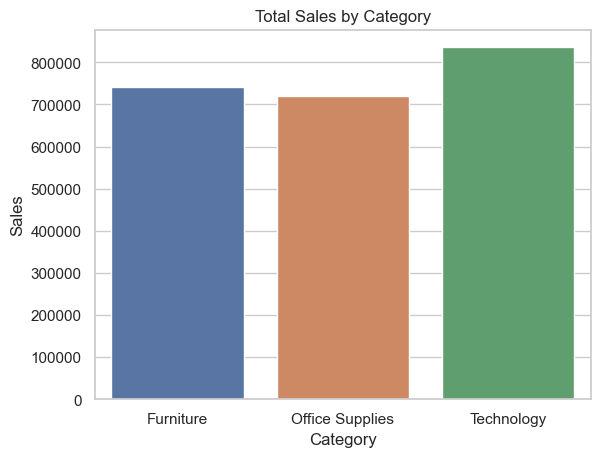

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

category_summary = data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
sns.barplot(x='Category', y='Sales', data=category_summary)
plt.title("Total Sales by Category")
plt.show()
#We’re using Seaborn and Matplotlib to create a bar chart.

#This helps visualize patterns instead of just seeing raw numbers.



In [33]:
#New Features for Deep Analysis
# Ensure Order Date is in datetime format
import pandas as pd

data['Order Date']=pd.to_datetime(data['Order Date'])

In [34]:
# 2) Convert dates to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date']  = pd.to_datetime(data['Ship Date'])

# 3) Create new time-based columns
data['Year']       = data['Order Date'].dt.year
data['Month']      = data['Order Date'].dt.month
data['Weekday']    = data['Order Date'].dt.day_name()
data['Month_Year'] = data['Order Date'].dt.to_period('M')

# 4) Check the first few rows to verify
data[['Order Date','Year','Month','Weekday','Month_Year']].head()


,Order Date,Year,Month,Weekday,Month_Year
0,2016-11-08,2016,11,Tuesday,2016-11
1,2016-11-08,2016,11,Tuesday,2016-11
2,2016-06-12,2016,6,Sunday,2016-06
3,2015-10-11,2015,10,Sunday,2015-10
4,2015-10-11,2015,10,Sunday,2015-10


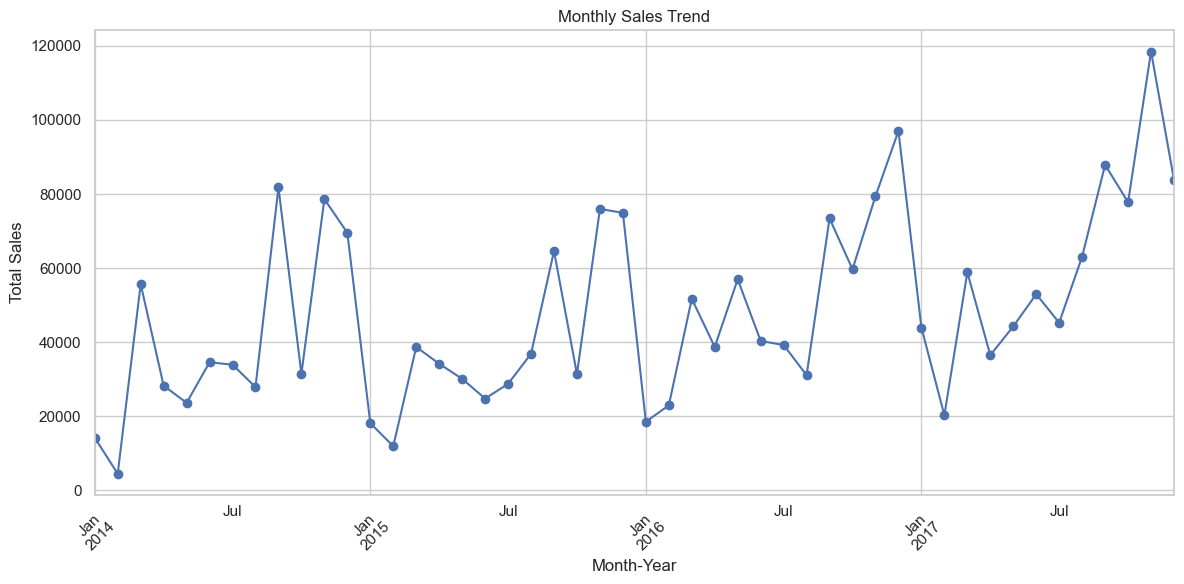

In [35]:
#Analyze Monthly Sales Trend
# Grouping sales by Month_Year
monthly_sales = data.groupby('Month_Year')['Sales'].sum()

# Plotting the sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6)) # Size of the figure
monthly_sales.plot(kind='line', marker='o')# Line plot with circular markers
plt.title('Monthly Sales Trend') # Title of the chart
plt.ylabel('Total Sales')
plt.xlabel('Month-Year')
plt.grid(True)# Add grid lines for better readability
plt.xticks(rotation=45)# Rotate X-axis labels for clarity
plt.tight_layout()
plt.show()
#This code groups the data by month and year, sums the sales for each month, and then plots it.


In [36]:
import pandas as pd
import plotly.express as px
import streamlit as st

# Load data with encoding to avoid decode errors
data = pd.read_csv("C:/Users/nithi/Downloads/archive (1)/Sample - Superstore.csv", encoding='latin1')

# Convert Order Date column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

filtered_data = data  # for now, no filters

st.subheader("💡 Discount vs Profit (Enhanced View)")

fig = px.scatter(
    filtered_data,
    x="Discount",
    y="Profit",
    color="Category",
    size="Sales",
    hover_name="Product Name",
    hover_data={"Sales": ":,.2f", "Quantity": True, "Category": True},
    title="📉 Impact of Discount on Profit by Category",
    labels={
        "Discount": "Discount (%)",
        "Profit": "Profit ($)"
    },
    template="plotly_white"
)

fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    title_font=dict(size=22),
    legend_title="Product Category",
    margin=dict(l=20, r=20, t=40, b=20),
    height=550,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

st.plotly_chart(fig, use_container_width=True)


DeltaGenerator()

<Figure size 1400x800 with 0 Axes>

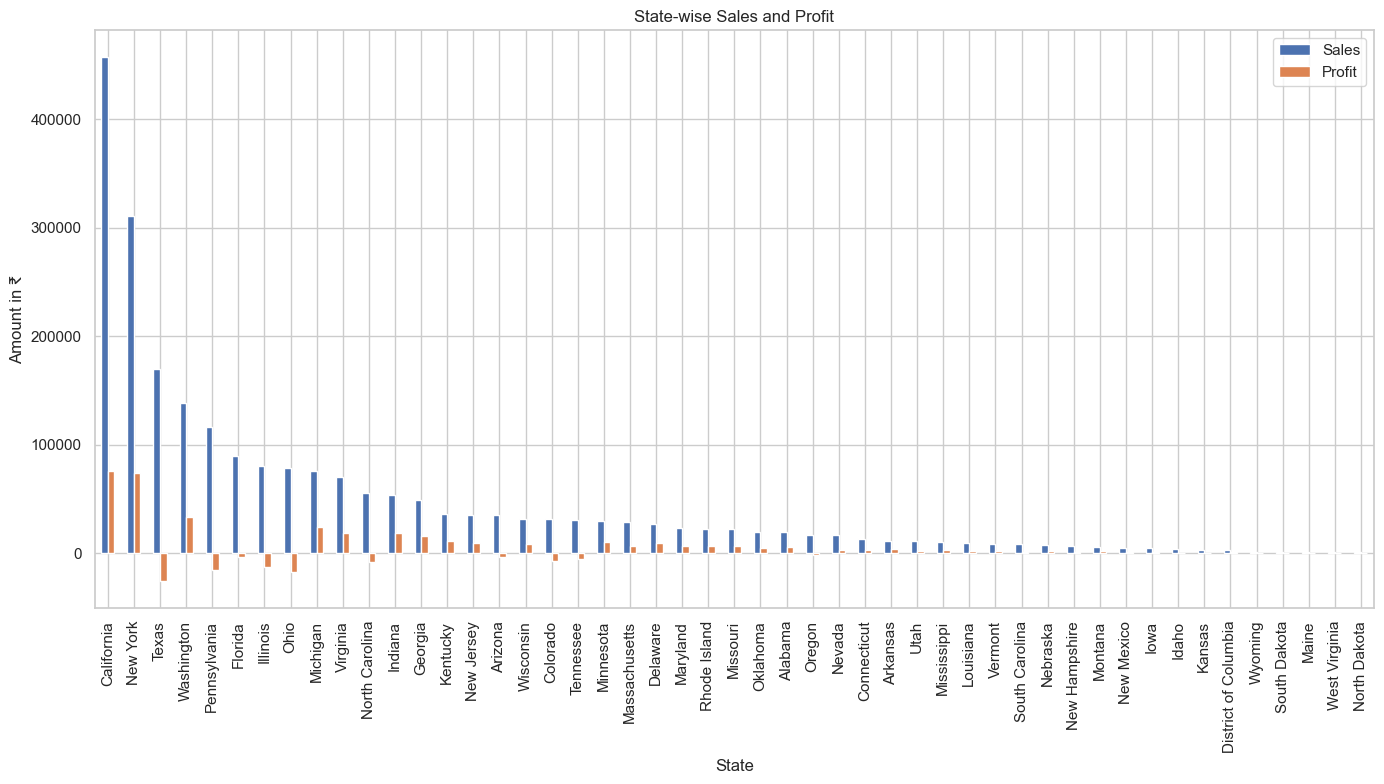

In [37]:
# Region/State-wise Sales & Profit Analysis
# Group data by State
state_perf = data.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(14,8))
state_perf.plot(kind='bar', figsize=(14,8))
plt.title('State-wise Sales and Profit')
plt.xlabel('State')
plt.ylabel('Amount in ₹')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


C:\Users\nithi\AppData\Local\Temp\ipykernel_25008\1976820656.py:26: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

c:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



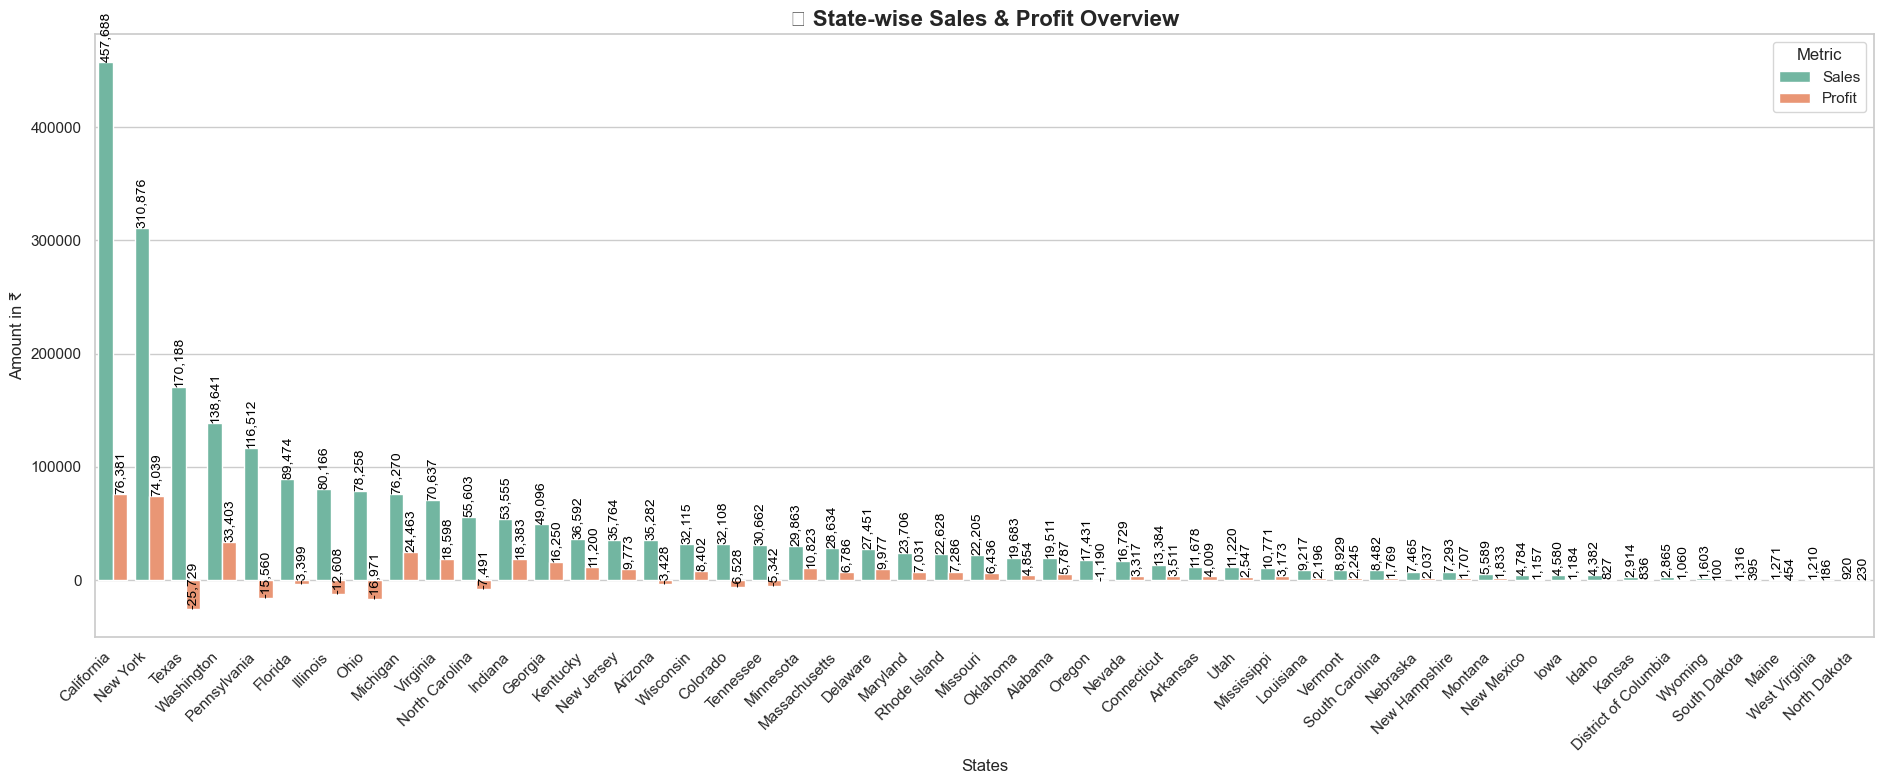

In [38]:
#Enhanced Version: State-wise Sales & Profit (Seaborn Style)
import seaborn as sns
import matplotlib.pyplot as plt
# prepare for state performance data analysis
state_perf= data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()#reset_index() This is a Pandas method used to reset the index of a DataFrame.
#setting the theme 
sns.set_theme(style="whitegrid")
# Plotting both Sales and Profit as side-by-side bars
plt.figure(figsize=(19,8))
barplot=sns.barplot(data=state_perf.melt(id_vars='State'),
                    x='State', y='value', hue='variable', palette='Set2')

# Annotate each bar with values
for p in barplot.patches:# Loop through each bar
    height = p.get_height()  # Get the height of the bar
    if height !=0:
        barplot.annotate(f'{height:,.0f}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=10, color='black', rotation=90)
# Title and labels
plt.title('📊 State-wise Sales & Profit Overview', fontsize=16, weight='bold')
plt.xlabel('States', fontsize=12)
plt.ylabel('Amount in ₹', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', loc='upper right')
plt.tight_layout()
plt.show()
#This enhanced version uses Seaborn for better aesthetics and adds annotations to each bar for clarity.
#Feature	Purpose
#sns.set_theme()	Cleaner grid and better font for business look
#palette='Set2'	Distinct and professional color scheme
#melt() function	Allows plotting both Sales and Profit together
#Annotations	Makes values visible without needing to hover

c:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from current font.



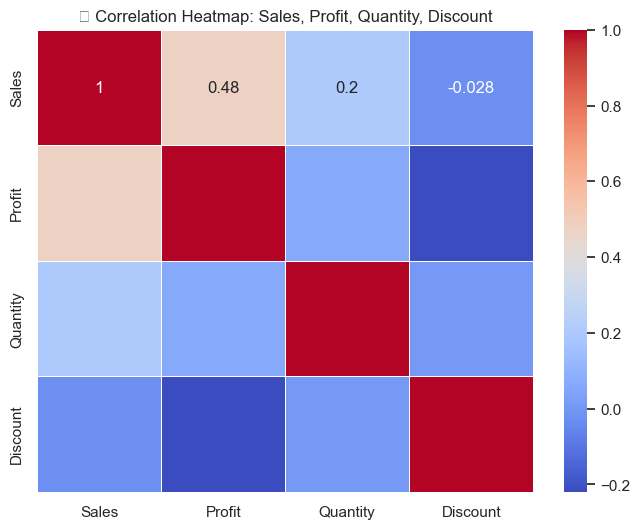

In [39]:
#Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
num_cols = data[['Sales', 'Profit', 'Quantity', 'Discount']]

# Compute correlation matrix
corr_matrix = num_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('🔗 Correlation Heatmap: Sales, Profit, Quantity, Discount')
plt.show()
#This code computes the correlation between Sales, Profit, Quantity, and Discount, and visualizes it using a heatmap.

In [40]:
#Pivot Tables (Matrix View in Pandas)
pivot_matrix = data.pivot_table(values='Sales', 
                                index='Category', 
                                columns='Region', 
                                aggfunc='sum', 
                                margins=True)
print(pivot_matrix)


Region               Central        East       South         West  \
Category                                                            
Furniture        163797.1638  208291.204  117298.684  252612.7435   
Office Supplies  167026.4150  205516.055  125651.313  220853.2490   
Technology       170416.3120  264973.981  148771.908  251991.8320   
All              501239.8908  678781.240  391721.905  725457.8245   

Region                    All  
Category                       
Furniture        7.419998e+05  
Office Supplies  7.190470e+05  
Technology       8.361540e+05  
All              2.297201e+06  


c:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



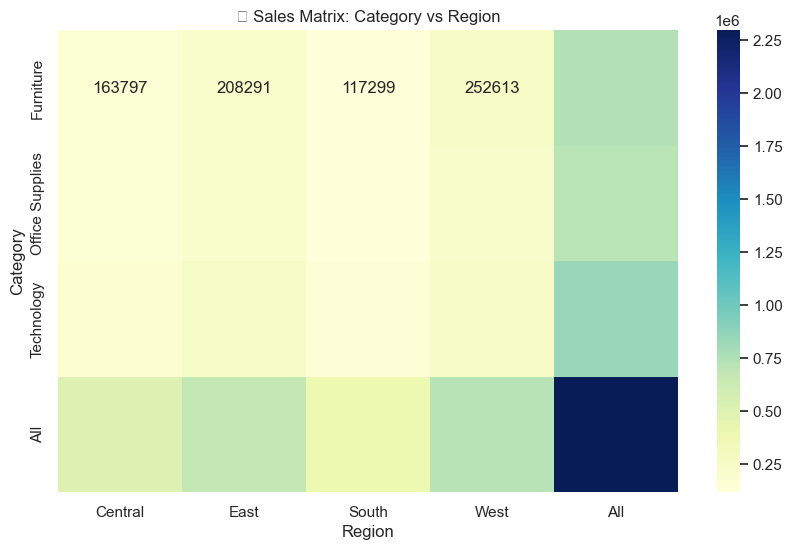

In [41]:
#Heatmap from a Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(pivot_matrix, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("📊 Sales Matrix: Category vs Region")
plt.show()


In [42]:
#Crosstab (Another type of matrix)
matrix = pd.crosstab(data['Segment'], data['Region'])
print(matrix)


Region       Central  East  South  West
Segment                                
Consumer        1212  1469    838  1672
Corporate        673   877    510   960
Home Office      438   502    272   571


In [43]:
#Multi-Metric Matrix
data.pivot_table(values=['Sales', 'Profit'], 
                 index='Category', 
                 columns='Segment', 
                 aggfunc='sum')


Profit                               Sales               \
Segment            Consumer   Corporate Home Office    Consumer    Corporate   
Category                                                                       
Furniture         6991.0786   7584.8158   3875.3784  391049.312  229019.7858   
Office Supplies  56330.3210  40227.3202  25933.1596  363952.136  230676.4620   
Technology       70797.8096  44166.9980  30490.1405  406399.897  246450.1190   

                              
Segment          Home Office  
Category                      
Furniture        121930.6975  
Office Supplies  124418.4340  
Technology       183304.0170

In [44]:
#Export for Tableau
data.to_csv(r"C:\Users\nithi\Documents\Superstore_Enhanced.csv", index=False)

